# Time Forecasting ( Airlines Passengers )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(open("Problem_statement.txt").read())

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.



In [3]:
data = pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.shape

(96, 2)

In [5]:
96/12

8.0

In [6]:
indexedData = data.set_index(['Month'])
indexedData

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


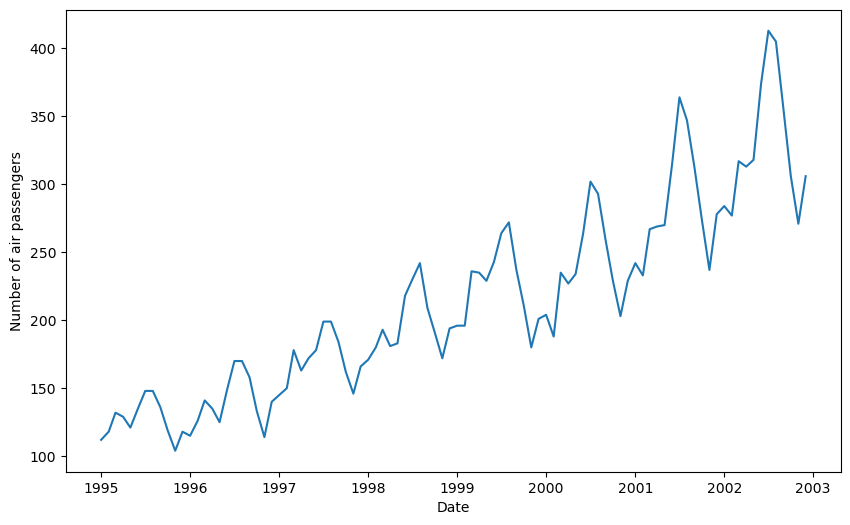

In [7]:
plt.figure(figsize= (10,6))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedData)

#### Determining optimal window size for moving statistics

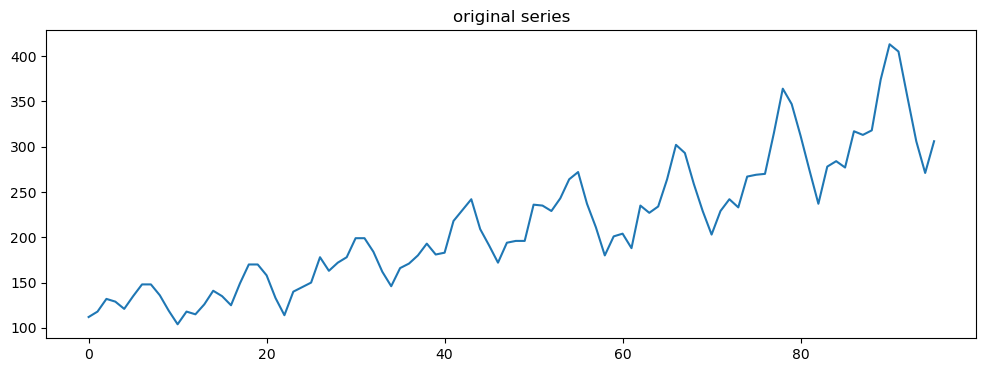

<Figure size 1200x400 with 0 Axes>

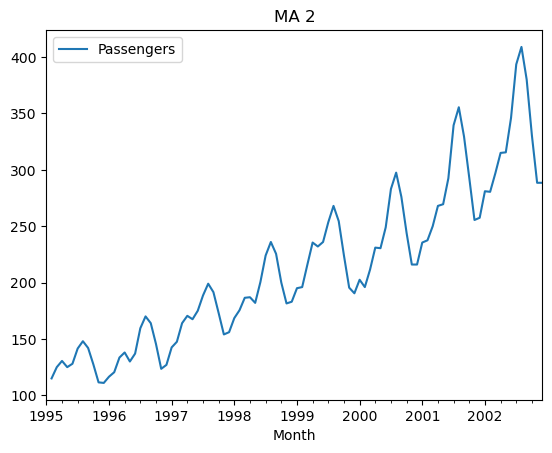

<Figure size 1200x400 with 0 Axes>

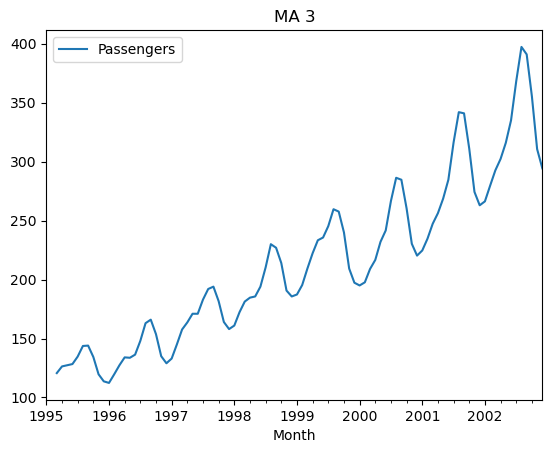

<Figure size 1200x400 with 0 Axes>

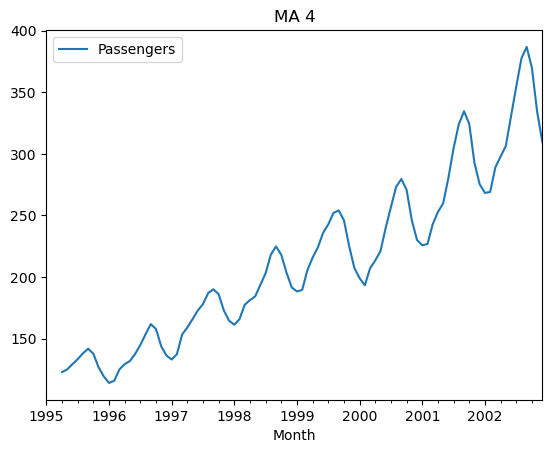

<Figure size 1200x400 with 0 Axes>

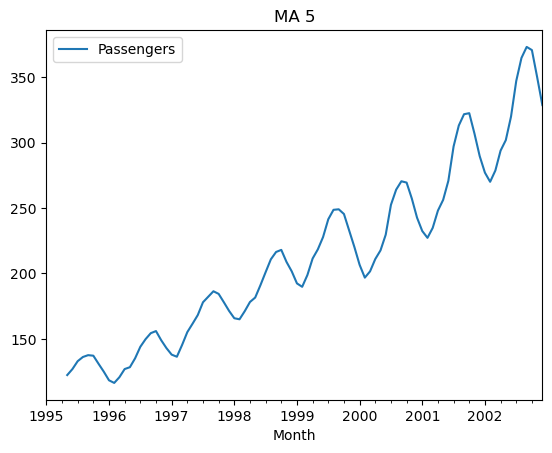

<Figure size 1200x400 with 0 Axes>

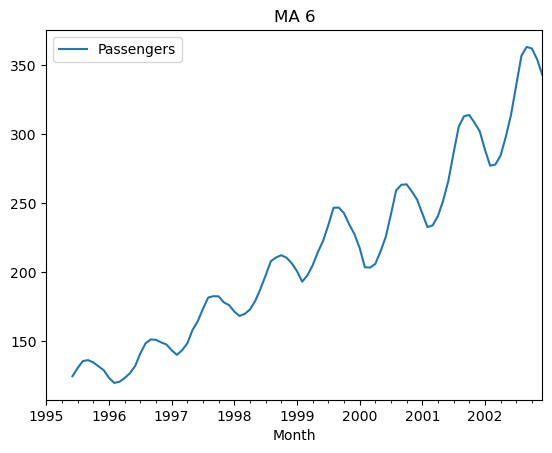

<Figure size 1200x400 with 0 Axes>

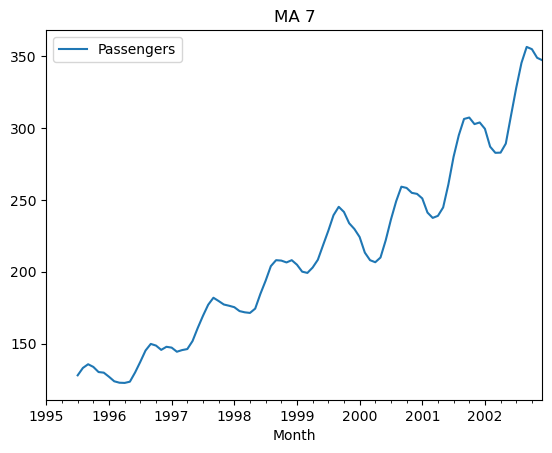

<Figure size 1200x400 with 0 Axes>

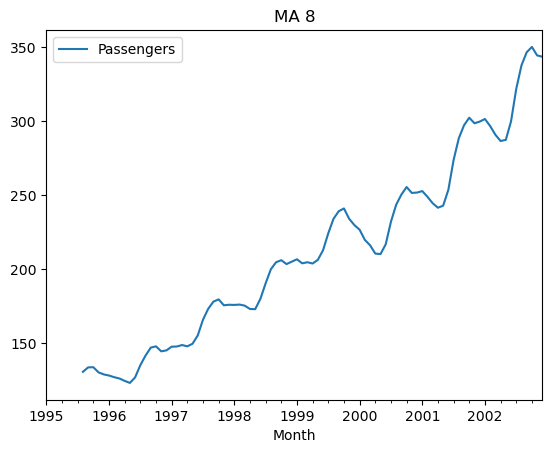

<Figure size 1200x400 with 0 Axes>

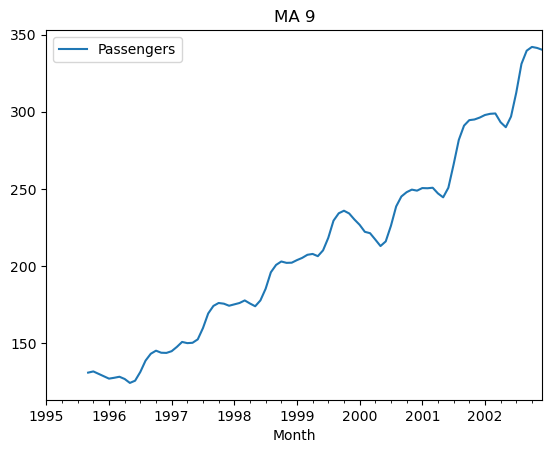

<Figure size 1200x400 with 0 Axes>

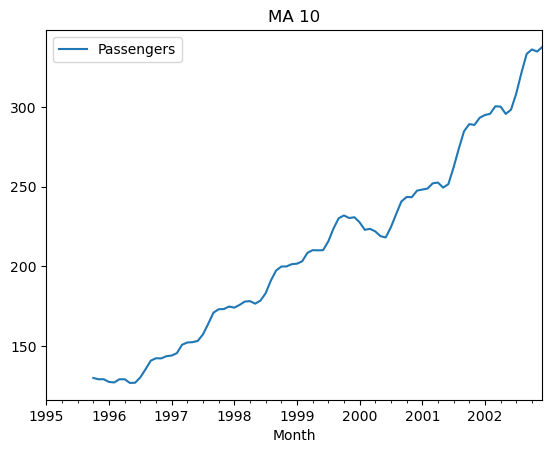

<Figure size 1200x400 with 0 Axes>

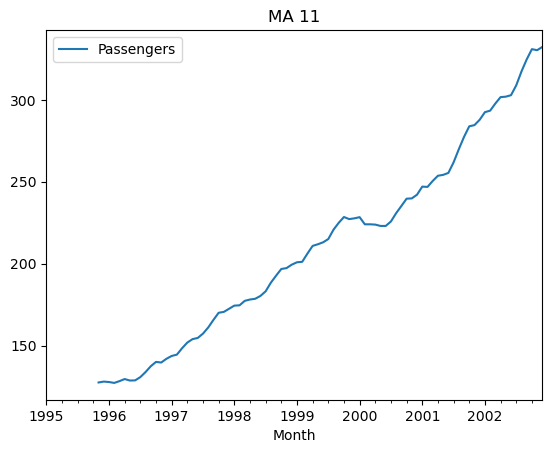

<Figure size 1200x400 with 0 Axes>

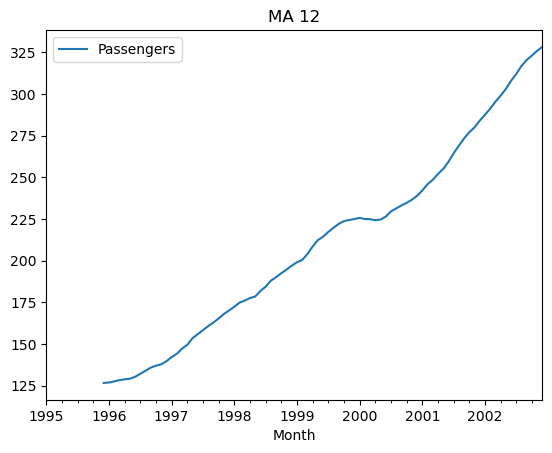

<Figure size 1200x400 with 0 Axes>

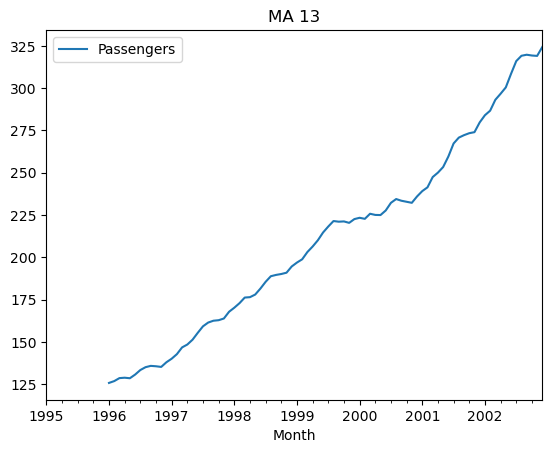

<Figure size 1200x400 with 0 Axes>

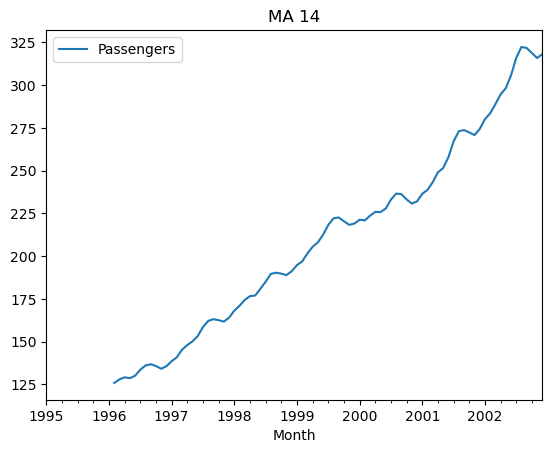

<Figure size 1200x400 with 0 Axes>

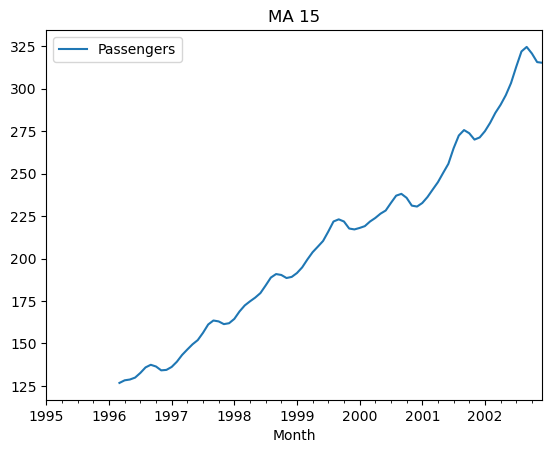

<Figure size 1200x400 with 0 Axes>

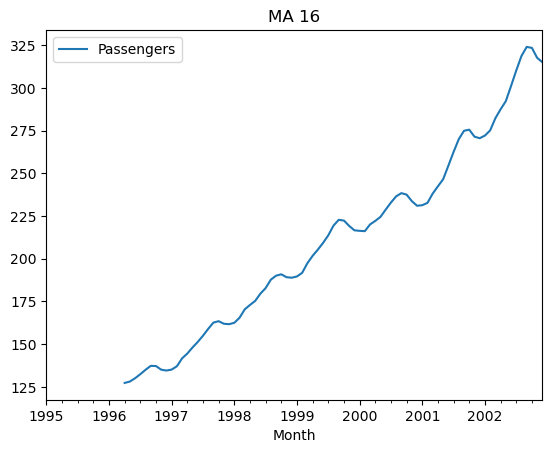

<Figure size 1200x400 with 0 Axes>

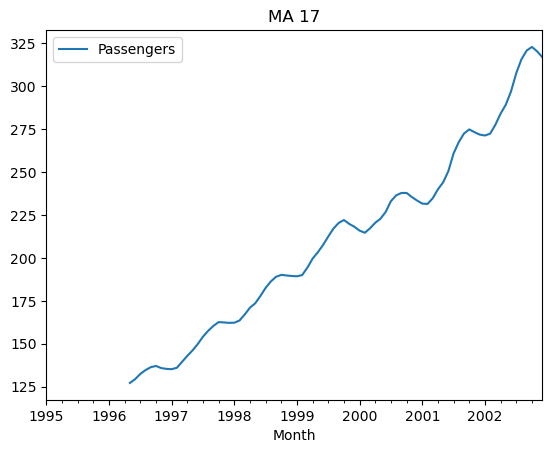

<Figure size 1200x400 with 0 Axes>

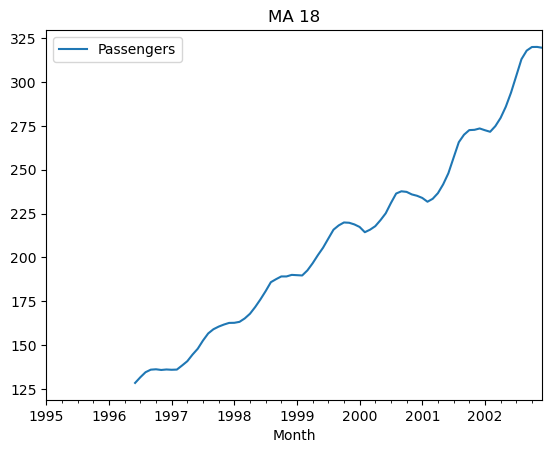

<Figure size 1200x400 with 0 Axes>

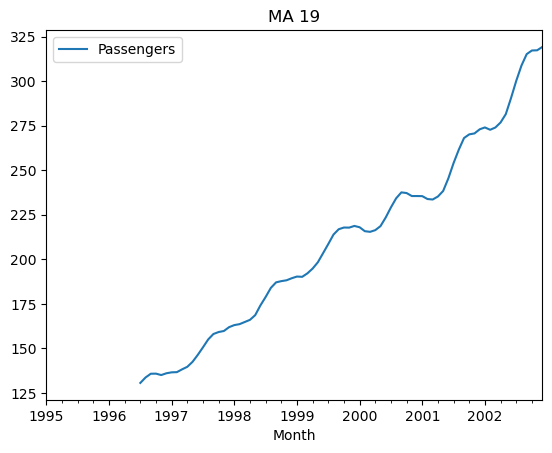

<Figure size 1200x400 with 0 Axes>

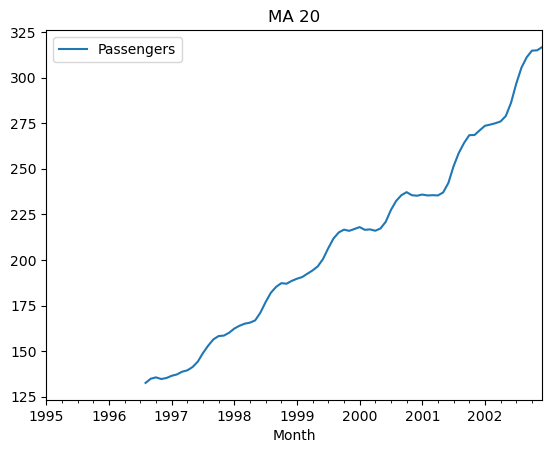

<Figure size 1200x400 with 0 Axes>

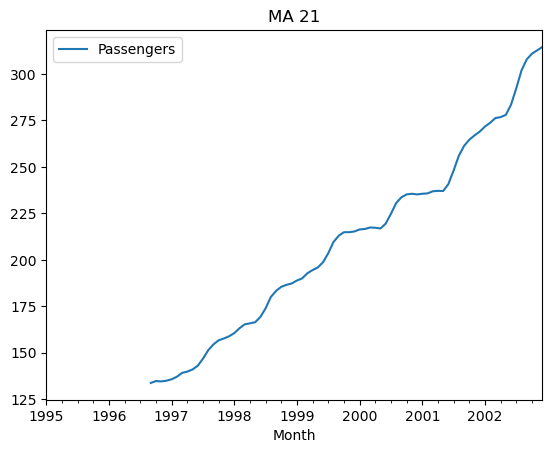

<Figure size 1200x400 with 0 Axes>

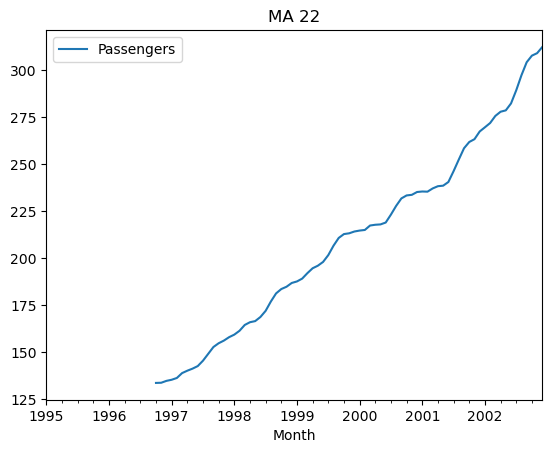

<Figure size 1200x400 with 0 Axes>

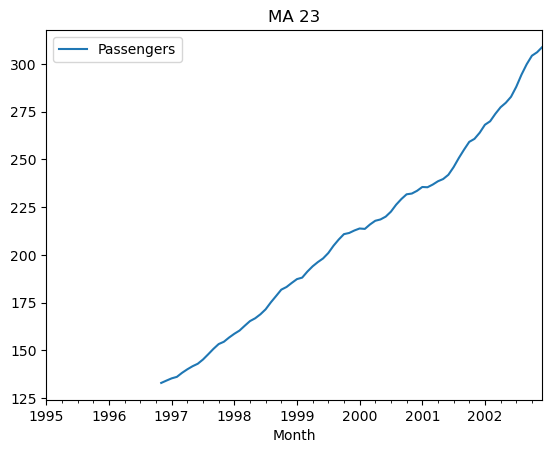

<Figure size 1200x400 with 0 Axes>

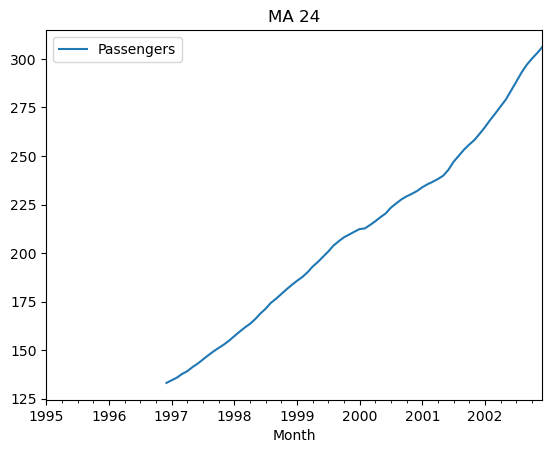

In [8]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):                       # to find optimal windaow size
    plt.figure(figsize=(12,4))
     
    indexedData.rolling(i).mean().plot(label=str(i))     # roling is nothing but moving average
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

By seeing the above plots we can clearly say that optimal window size is 12

### Determining Moving statistics

In [9]:
rolmean = indexedData.rolling(window=12).mean()
rolstd = indexedData.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


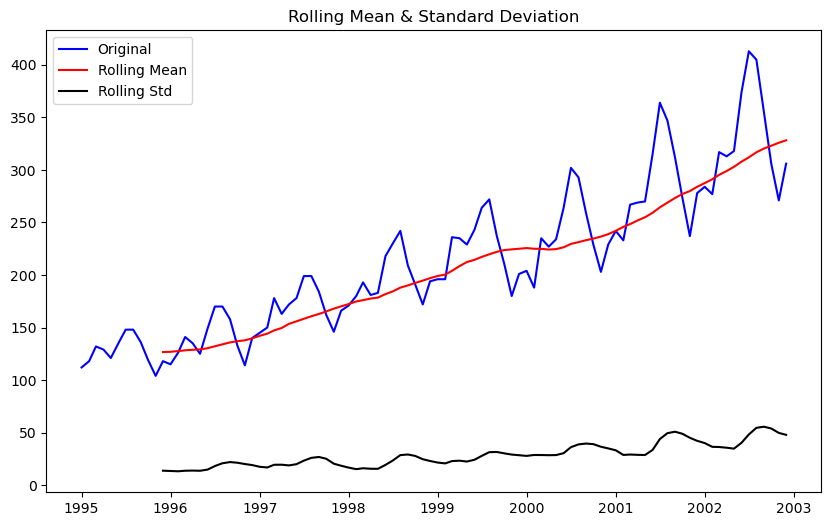

In [10]:
#Plot rolling statistics:
plt.figure(figsize= (10,6))
orig = plt.plot(indexedData, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    

### Augmented Dickey-Fuller test:


In [11]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedData, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


p_value is heigh therefore it is not a stationary data

Therefore we go for Data based techniques

#### Logscale

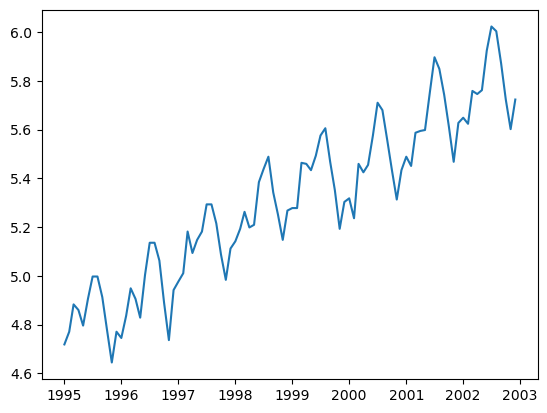

In [12]:
# Estimating trend
indexedDataset_logScale = np.log(indexedData)
plt.plot(indexedDataset_logScale)

### Seasonal Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

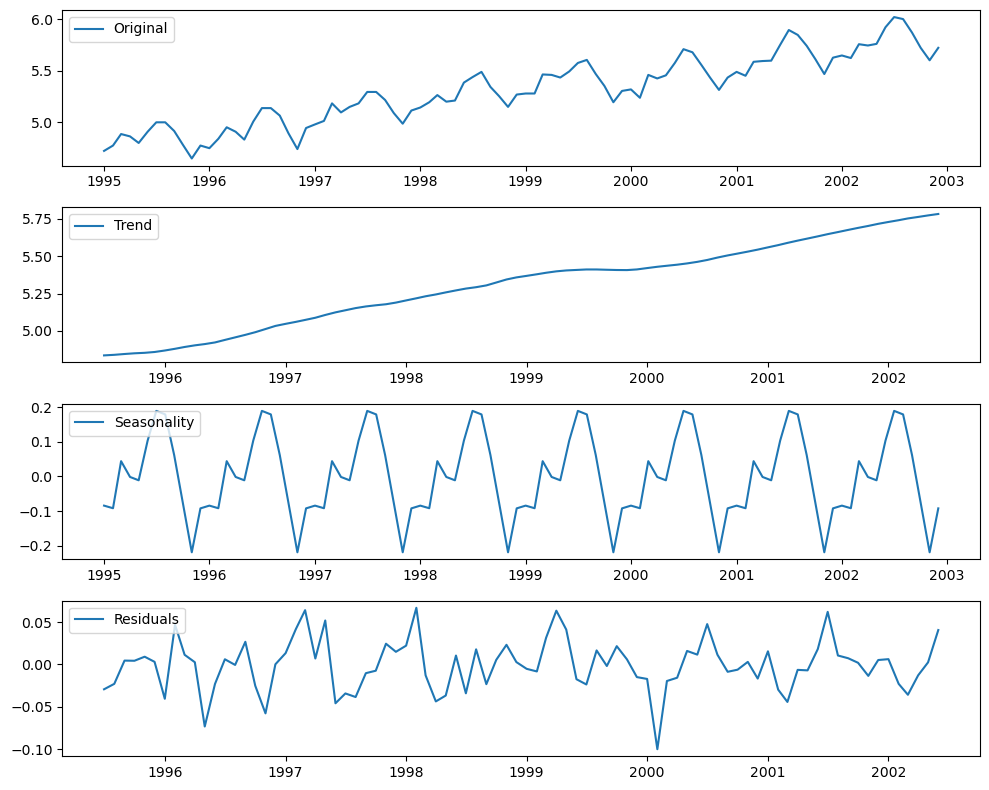

In [14]:
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

### Splitting the data into Training and Testing 

In [15]:
train = data.head(84)
test = data.tail(12)

In [16]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [17]:
test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


#### Mean actual Predicted Error ( MAPE value )

In [18]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Smoothing Model

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing # double exponential
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # triple exponential

#### HYperparameter tunning for smoothing_level

In [20]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(test.Passengers, pred_ses) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 15.813278839980043
smoothing_level  0.1473684210526316 --> MAPE Error 13.998308786798612
smoothing_level  0.19473684210526315 --> MAPE Error 13.43875758983704
smoothing_level  0.24210526315789474 --> MAPE Error 13.361780244106626
smoothing_level  0.2894736842105263 --> MAPE Error 13.557114617029564
smoothing_level  0.33684210526315794 --> MAPE Error 13.895321792313554
smoothing_level  0.38421052631578945 --> MAPE Error 14.289593448209663
smoothing_level  0.43157894736842106 --> MAPE Error 14.76306690519897
smoothing_level  0.4789473684210527 --> MAPE Error 15.224824028669062
smoothing_level  0.5263157894736842 --> MAPE Error 15.600944301455975
smoothing_level  0.5736842105263158 --> MAPE Error 15.874993628428266
smoothing_level  0.6210526315789474 --> MAPE Error 16.071640221230833
smoothing_level  0.6684210526315789 --> MAPE Error 16.145012862053974
smoothing_level  0.7157894736842105 --> MAPE Error 16.091775475637615
smoothing_level  0.7631578947368

Best MAPE value is for smoothing_level = 0.24

#### Model

In [21]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
MAPE(test.Passengers, pred_ses) 

13.358245180077153

In [22]:
pred_ses

84    282.651011
85    282.651011
86    282.651011
87    282.651011
88    282.651011
89    282.651011
90    282.651011
91    282.651011
92    282.651011
93    282.651011
94    282.651011
95    282.651011
dtype: float64

###  Holts Exponential Smoothing Model or Double exponential Model

#### Hyperparameter tunning for smoothing_level and smoothing_trend

In [23]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(train["Passengers"]).fit(smoothing_level=i, smoothing_trend=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_hw,test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.825704247259536
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.985096048337164
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.308431982806995
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.748307081460679
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 12.004590266160383
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.027792525862091
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.829735289729621
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 11.538473056508655
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 11.309105032406649
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 11.41443707415928
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.506480544893671
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.057273727536993
smoothing_level  0.19  smoothing_s

smoothing_level  0.64  smoothing_slope 0.37 --> MAPE Error 87.66627246870983
smoothing_level  0.64  smoothing_slope 0.45999999999999996 --> MAPE Error 110.77986519743672
smoothing_level  0.64  smoothing_slope 0.5499999999999999 --> MAPE Error 113.6931393626394
smoothing_level  0.64  smoothing_slope 0.64 --> MAPE Error 95.78744164332021
smoothing_level  0.64  smoothing_slope 0.73 --> MAPE Error 70.2054879363928
smoothing_level  0.64  smoothing_slope 0.82 --> MAPE Error 45.97773955970152
smoothing_level  0.64  smoothing_slope 0.9099999999999999 --> MAPE Error 25.781520338069143
smoothing_level  0.73  smoothing_slope 0.1 --> MAPE Error 22.272997416577756
smoothing_level  0.73  smoothing_slope 0.19 --> MAPE Error 35.33831795047713
smoothing_level  0.73  smoothing_slope 0.28 --> MAPE Error 52.00616663545873
smoothing_level  0.73  smoothing_slope 0.37 --> MAPE Error 65.99057221581262
smoothing_level  0.73  smoothing_slope 0.45999999999999996 --> MAPE Error 69.27284597449291
smoothing_level  

In [24]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
1,0.10,0.19,10.985096
11,0.19,0.19,11.057274
12,0.19,0.28,11.166573
2,0.10,0.28,11.308432
8,0.10,0.82,11.309105
...,...,...,...
49,0.46,0.91,826.936017
47,0.46,0.73,858.326625
46,0.46,0.64,1304.676022
37,0.37,0.73,1611.465475


Best MAPE score is 10.98 
for smopthing_level = 0.1 and
smoothing_slope = 0.19

#### Model

In [25]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.1, smoothing_trend=0.19)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

10.985096048337164

In [26]:
pred_hw

84    302.762444
85    306.732184
86    310.701923
87    314.671662
88    318.641401
89    322.611141
90    326.580880
91    330.550619
92    334.520358
93    338.490097
94    342.459837
95    346.429576
dtype: float64

### Holts winter exponential smoothing with additive seasonality and additive trend or  triple exponential

In [27]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

In [28]:
MAPE(pred_hwe_add_add,test.Passengers) 

6.385121893849516

In [29]:
pred_hwe_add_add

84    280.940661
85    281.809102
86    309.088602
87    302.923921
88    302.203371
89    326.200066
90    351.202820
91    350.349257
92    325.207585
93    300.063491
94    276.785815
95    301.078004
dtype: float64

For all the above 3 models

triple exponential model is giving less error i,e MAPE score is less for this model

#### Building a Model for whole data and predicting the next years values

In [30]:
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [31]:
#Forecasting for next 10 time periods
new=hwe_model_add_add.forecast(10)
df=pd.DataFrame(new, columns= ["Passengers"])
df

,Passengers
96,319.235250
97,311.528363
98,350.278666
99,346.984953
100,351.844997
101,403.925669
102,440.566746
103,427.446408
104,376.628091
105,329.767424


predicted No. of Passengers for the year 2003

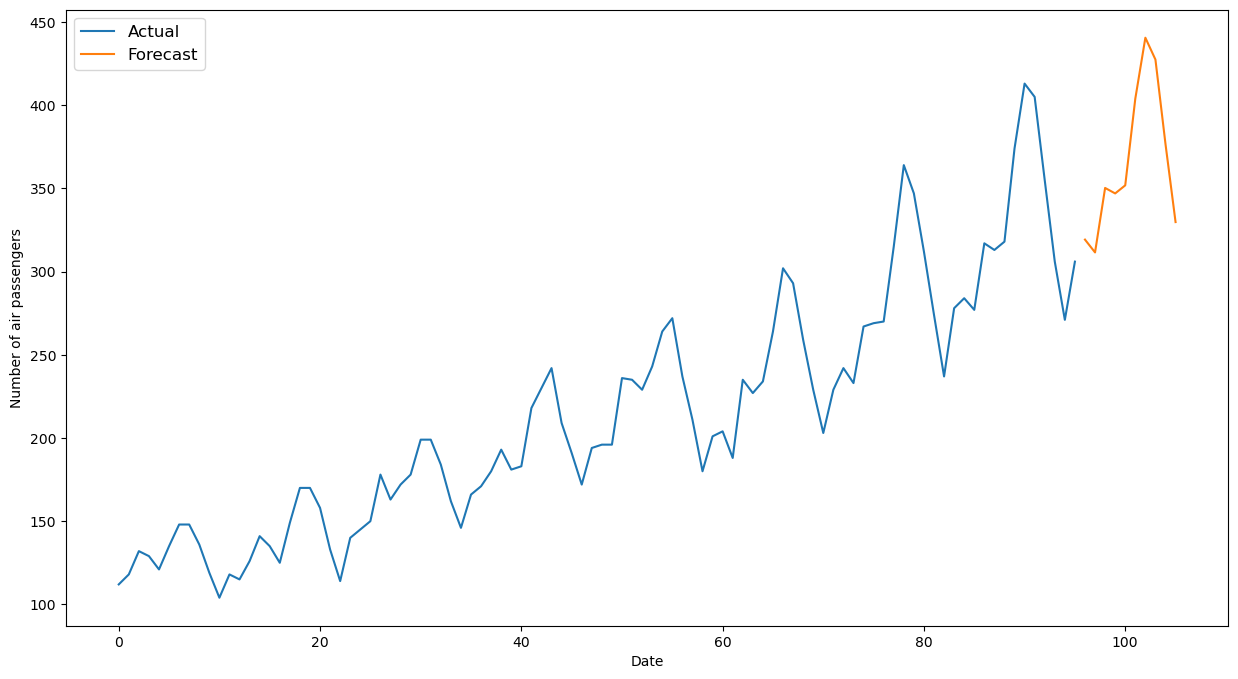

In [32]:
plt.figure(figsize= (15,8))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(data["Passengers"], label="Actual")
plt.plot(df["Passengers"], label="Forecast")
plt.legend(loc='upper left', fontsize=12)
plt.show()

Forecasted data for the year 2003. is ploted in the above graph